# Nuclear statistical equilibrium

In [1]:
import pynucastro as pyna

We'll explore only a small set of nuclei around the iron-group.  Of course, nature can
access all nuclei, so our results will be an approximation.

The NSE abundance depends on $(\rho, T, Y_e)$.  In particular, the electron fraction, $Y_e$ is going
to dictact the electron fraction of the resulting NSE composition.

In [2]:
rlib = pyna.ReacLibLibrary()
nse_lib = rlib.linking_nuclei(["p", "n", "he4",
                               "fe52", "fe53", "fe54", "fe55", "fe56",
                               "co54", "co55", "co56", "co57",
                               "ni56", "ni57", "ni58"])

In [3]:
nse = pyna.NSENetwork(libraries=nse_lib)

/home/zingale/development/pynucastro/pynucastro/networks/rate_collection.py:573: UserWarning: ReacLib neutron decay rate (<n_to_p_weak_wc12>) does not account for degeneracy at high densities. Consider using tabular rate from Langanke.
  warnings.warn(msg)


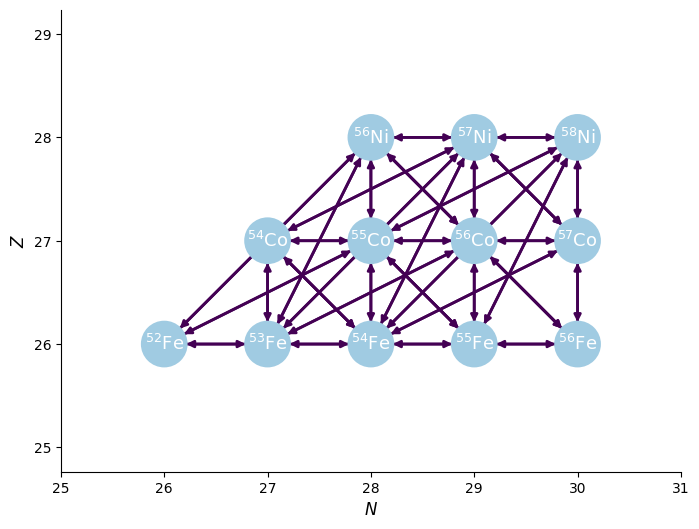

In [4]:
fig = nse.plot()

Let's start with some conditions that are roughly appropriate for the core of a massive star.

We'll start with $Y_e = 0.5$ and then see how the composition changes as it is lowered.

In [5]:
rho = 1.e9
T = 6.e9
Ye = 0.5

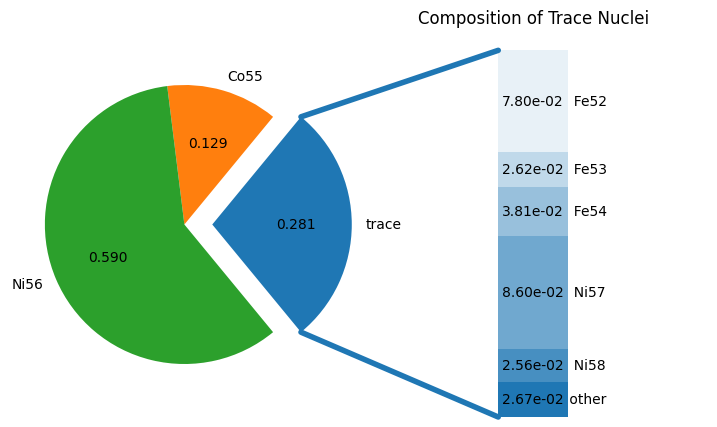

In [6]:
comp = nse.get_comp_nse(rho, T, Ye, use_coulomb_corr=True)
fig = comp.plot()

Here we see that ${}^{56}\mathrm{Ni}$ dominates, as expected since $Z/A$ for it is 1/2.

Now let's lower Ye

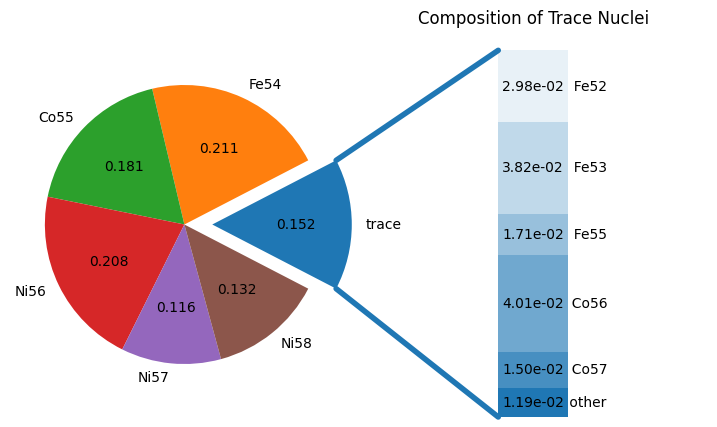

In [7]:
Ye = 0.49
comp = nse.get_comp_nse(rho, T, Ye, use_coulomb_corr=True)
fig = comp.plot()

Now we see that some neutron-rich nuclei start to appear in large abundance.

Let's lower again.

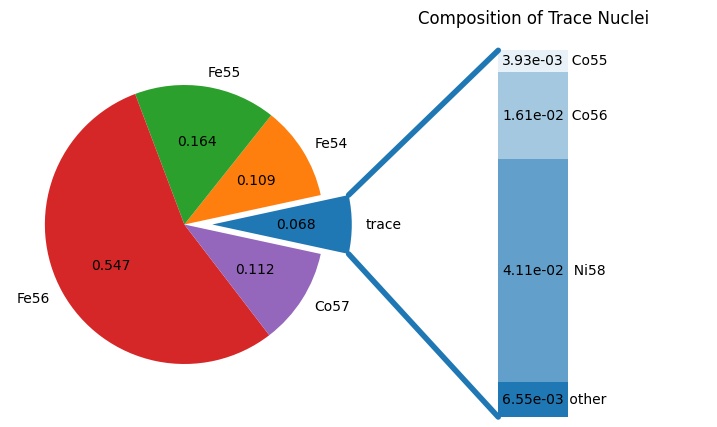

In [8]:
Ye = 0.47
comp = nse.get_comp_nse(rho, T, Ye, use_coulomb_corr=True)
fig = comp.plot()

${}^{56}\mathrm{Fe}$ has $Z/A = 0.464$, so as we drop $Y_e$ down to that level, we see it starting to dominate.

## Trend with temperature

Let's look at a fixed $Ye$ how the composition changes.  We'll do $Y_e = 0.48$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

We use the chemical potentials from the previous solve to help accelerate the next solve.

In [10]:
ye = 0.48
temps = np.logspace(9, 10.5, 100)
X_s = []
T_s = []
guess = [-3.5, -15.0]
for T in reversed(temps):
    nse_comp, sol = nse.get_comp_nse(rho, T, ye, init_guess=guess,
                                     use_coulomb_corr=True, return_sol=True)
    guess = sol
    nse_X_s = [nse_comp.X[nuc] for nuc in nse_comp.X]
    T_s.append(T)
    X_s.append(nse_X_s)

(0.05, 1.2)

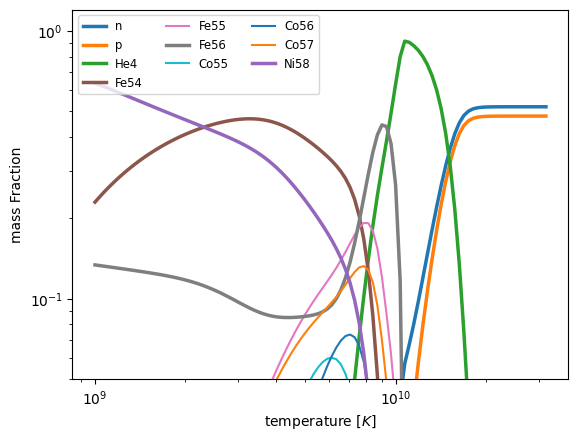

In [11]:
X_s = np.array(X_s)
nuc_names = nse.get_nuclei()

low_limit = 0.05
fig, ax = plt.subplots()
for k in range(len(nuc_names)):
    line, = ax.plot(T_s, X_s[:,k])
    if (max(X_s[:,k]) > low_limit):
        line.set_label(str(nuc_names[k]))
    if (max(X_s[:,k]) > 5 * low_limit):
        line.set_linewidth(2.5)

ax.legend(ncols=3, fontsize="small")
ax.set_xlabel(r"temperature $[K]$")
ax.set_ylabel("mass Fraction")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([low_limit, 1.2])

We see that at very high temperatures, the composition goes to mostly $\alpha$ first and then to a mix of neutrons and protons.